In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import skimage 
import sklearn

In [2]:
# Load the neural network vectors from a pickle file 
with open('NN_images.pickle', 'rb') as f:
    data = pickle.load(f)

In [7]:
from skimage import io

In [ ]:
from sklearn import cluster

In [58]:
NCLUST = 12

In [59]:
# make a clustering object, called KMC, which is a k means clusterer with 6 clusters
KMC = cluster.KMeans(n_clusters = NCLUST)

In [60]:
# Load the data features into F.....
F = data['features']

In [78]:
# Actually do the clustering on F, and save the result into the variable 'clusters'
clusters = KMC.fit_predict(F)
# add here the calculation for the distances between the cluster centres and the individual images. 
distances = KMC.transform(F)

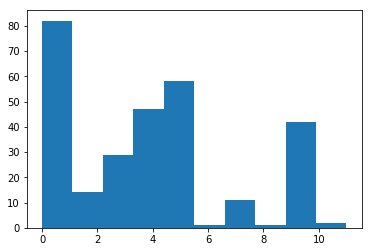

In [79]:
plt.hist(clusters);

In [80]:
allIms = data['image_paths']

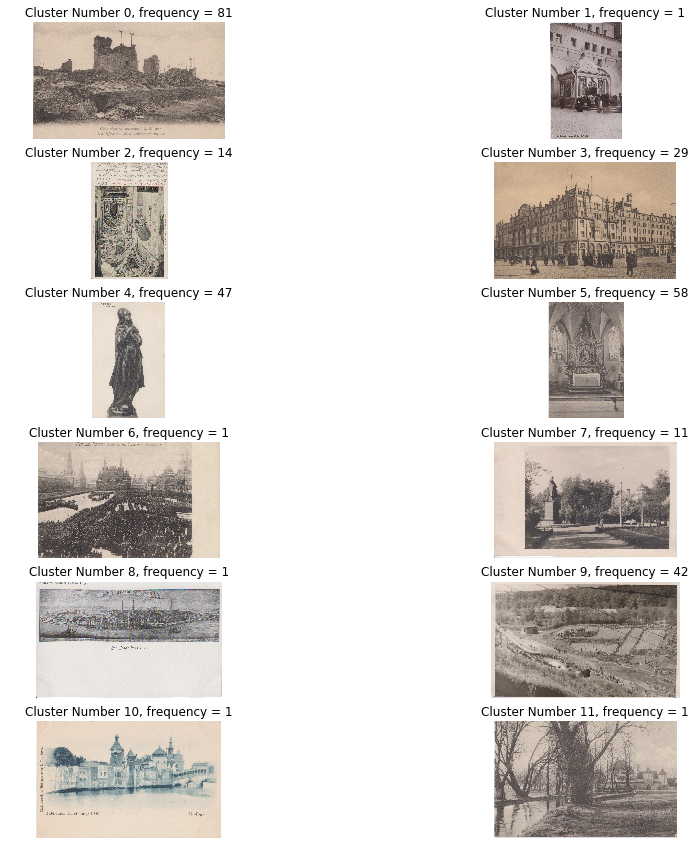

In [94]:
plt.figure(figsize=(15,15))
for i in range(NCLUST):
    plt.subplot(6,2,i+1)
    idx = np.nonzero(clusters==i)[0]
    subIms = allIms[idx[0]]
    plt.imshow( io.imread( subIms  )  )
    plt.axis('off')
    plt.title('Cluster Number ' + str(i) + ', frequency = ' + str(len(idx)))

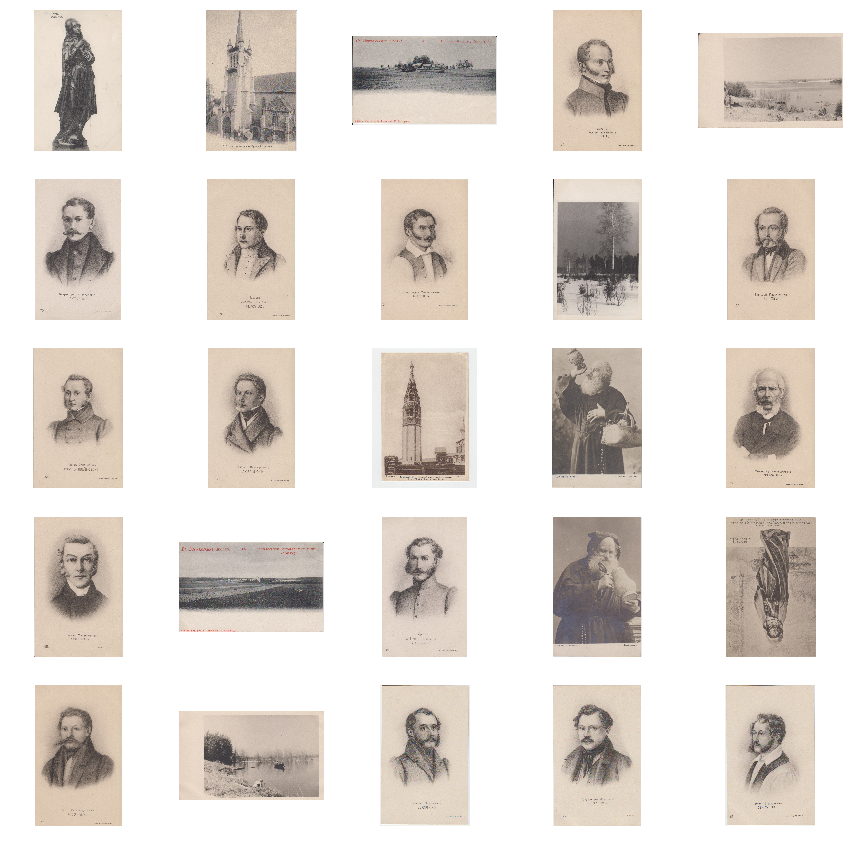

In [97]:
VISCLUST = 4
plt.figure(figsize=(15,15))
idx = np.nonzero(clusters==VISCLUST)[0]

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( io.imread( allIms[idx[i]]  )  )
    plt.axis('off')    

In [84]:
from scipy.spatial import distance 

In [85]:
for i in range(NCLUST): 
    np.argmin(distances[:,i])

1141

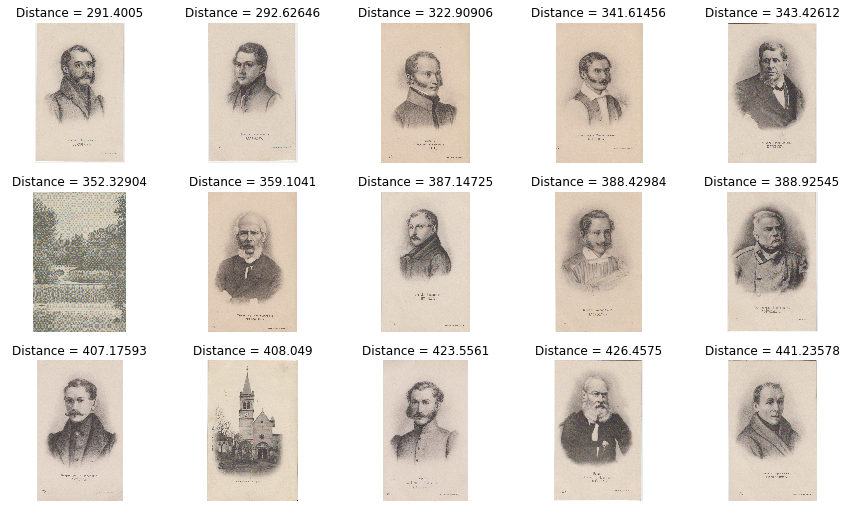

In [110]:
idx_sorted = np.argsort(distances[:,4])
plt.figure(figsize=(15,15))

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.imshow( io.imread(allIms[idx_sorted[i]])  )
    plt.axis('off')
    plt.title('Distance = ' + str(distances[idx_sorted[i],4]))